In [2]:
import pandas as pd
bike_rentals = pd.read_csv('bike_rental_hour.csv')
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


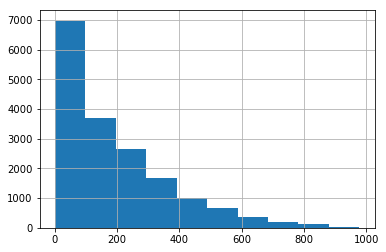

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
bike_rentals['cnt'].hist()

In [4]:
bike_rentals.corr()['cnt'].sort_values()

hum          -0.322911
weathersit   -0.142426
holiday      -0.030927
weekday       0.026900
workingday    0.030284
windspeed     0.093234
mnth          0.120638
season        0.178056
yr            0.250495
instant       0.278379
hr            0.394071
atemp         0.400929
temp          0.404772
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

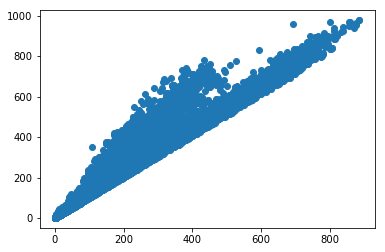

In [5]:
plt.scatter(bike_rentals['registered'], bike_rentals['cnt'])

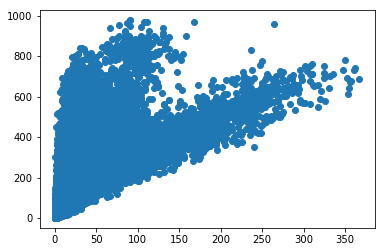

In [6]:
plt.scatter(bike_rentals['casual'], bike_rentals['cnt'])

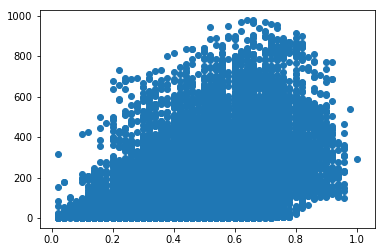

In [7]:
plt.scatter(bike_rentals['temp'], bike_rentals['cnt'])

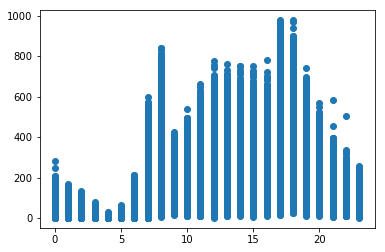

In [8]:
plt.scatter(bike_rentals['hr'], bike_rentals['cnt'])

In [9]:
def assign_label(value):
    value = int(value)
    if value >= 6 and value < 12:
        return 1
    if value >=12 and value < 18:
        return 2
    if value >=18 and value < 24:
        return 3
    if value >=0  and value < 6:
        return 4
    
bike_rentals['time_label'] = bike_rentals['hr'].apply(assign_label)

In [10]:
bike_rentals[['hr','time_label']].head(5)

,hr,time_label
0,0,4
1,1,4
2,2,4
3,3,4
4,4,4


Error metrics: RMSE, as cnt is continues. Also we would like to predict how many bikes are to be rented in an hour.

In [11]:
import numpy as np
import math
np.random.seed(1)

bike_rentals = bike_rentals.reindex(np.random.permutation(bike_rentals.index))
train_max_row = math.floor(bike_rentals.shape[0] * .8)
train = bike_rentals[0:train_max_row]
test = bike_rentals[train_max_row:]

In [12]:
train.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
15652,15653,2012-10-19,4,1,10,9,0,5,1,2,0.54,0.5152,0.94,0.1045,26,363,389,1
3085,3086,2011-05-13,2,0,5,11,0,5,1,2,0.52,0.5000,0.83,0.1642,56,90,146,1
1684,1685,2011-03-15,1,0,3,19,0,2,1,2,0.34,0.3182,0.71,0.2836,14,138,152,3
10555,10556,2012-03-20,1,1,3,22,0,2,1,1,0.54,0.5152,0.77,0.0000,32,156,188,3
14622,14623,2012-09-06,3,1,9,11,0,4,1,3,0.70,0.6667,0.84,0.1642,10,52,62,1


In [13]:
test.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
11756,11757,2012-05-10,2,1,5,1,0,4,1,2,0.48,0.4697,0.88,0.1343,2,9,11,4
6539,6540,2011-10-05,4,0,10,1,0,3,1,1,0.48,0.4697,0.77,0.1642,4,7,11,4
11407,11408,2012-04-25,2,1,4,12,0,3,1,1,0.54,0.5152,0.28,0.2836,49,220,269,2
8807,8808,2012-01-07,1,1,1,19,0,6,0,1,0.52,0.5000,0.42,0.1045,44,171,215,3
8727,8728,2012-01-04,1,1,1,11,0,3,1,2,0.08,0.1212,0.42,0.0896,6,40,46,1


In [14]:
np.any(train.index.isin(test.index))

False

In [15]:
bike_rentals.corr()['cnt'].map(lambda x: abs(x)).sort_values(ascending=False).index

Index(['cnt', 'registered', 'casual', 'temp', 'atemp', 'hr', 'time_label',
       'hum', 'instant', 'yr', 'season', 'weathersit', 'mnth', 'windspeed',
       'holiday', 'workingday', 'weekday'],
      dtype='object')

In [16]:
cols=['temp', 'atemp', 'hr', 'time_label',
       'hum', 'instant', 'season', 'weathersit', 'mnth', 'windspeed',
       'holiday', 'workingday', 'weekday']

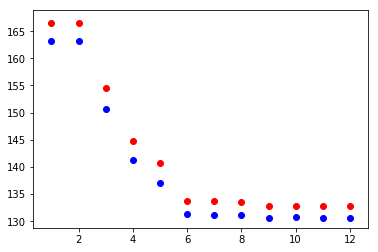

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
rmses = []
rmses_train = []
for i in range(1, len(cols)):
    used_col = cols[0:i]
    lr.fit(train[used_col], train['cnt'])
    pr = lr.predict(test[used_col])
    mse = mean_squared_error(test['cnt'], pr)
    rmse = mse ** (1/2)
    rmses.append(rmse)
    
    pr = lr.predict(train[used_col])
    mse = mean_squared_error(train['cnt'], pr)
    rmse = mse ** (1/2)
    rmses_train.append(rmse)

plt.scatter(range(1, len(cols)), rmses, c='blue')
plt.scatter(range(1, len(cols)), rmses_train, c='red')

Looking at the graph above, it is clear to see that rmse decreases with incease in cols,  but still there are huge errors.

In [18]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(train[cols], train['cnt'])
pr = dtr.predict(test[cols])
mean_squared_error(test['cnt'], pr) ** (1/2)

55.91366073552107

In [19]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_features='auto')
dtr.fit(train[cols], train['cnt'])
pr = dtr.predict(test[cols])
mean_squared_error(test['cnt'], pr) ** (1/2)

58.631210244455765

7
50.9435623783


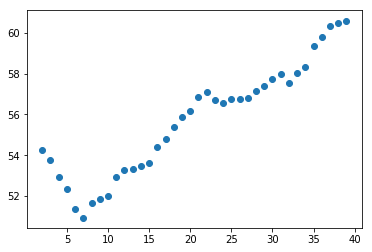

In [20]:
rmse_min_leaf = []
for i in range(2,40):
    dtr = DecisionTreeRegressor(max_features='auto', min_samples_leaf=i)
    dtr.fit(train[cols], train['cnt'])
    pr = dtr.predict(test[cols])
    rmse_min_leaf.append(mean_squared_error(test['cnt'], pr) ** (1/2))

plt.scatter(range(2,40), rmse_min_leaf)
print(np.argmin(rmse_min_leaf)+2) 
print(np.amin(rmse_min_leaf))

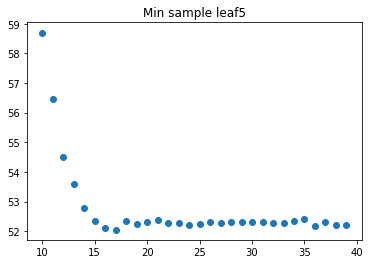

7
52.0554683026


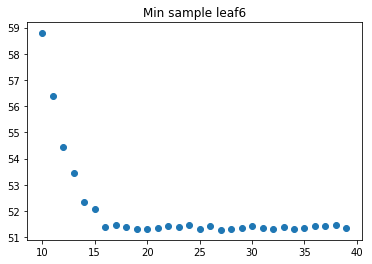

17
51.2883242036


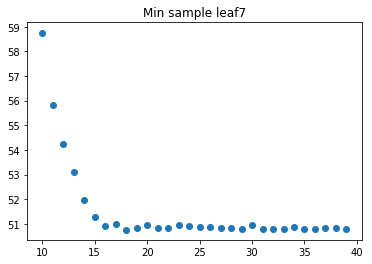

8
50.7683878596


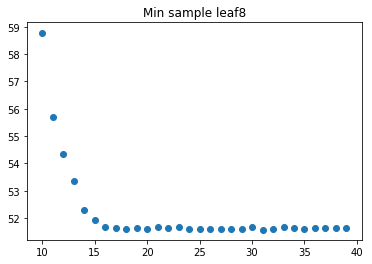

21
51.5777935422


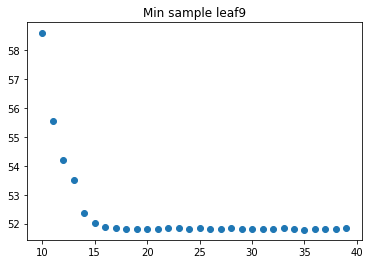

25
51.7960956884


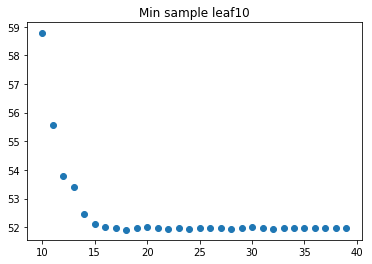

8
51.9182990114


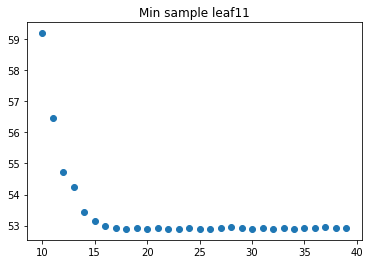

24
52.8763661974


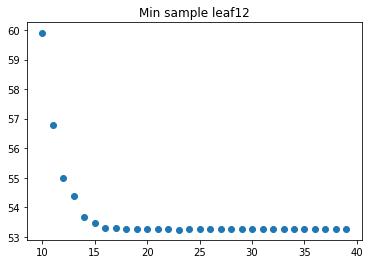

13
53.2509123998


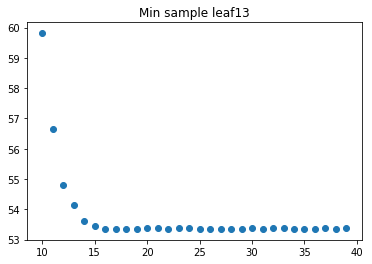

24
53.3305488987


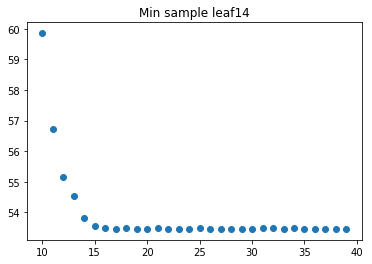

10
53.4401700133


In [21]:
for min_leaf in range(5, 15):
    rmse_max_depth = []
    for max_depth in range(10,40):
        dtr = DecisionTreeRegressor(max_features='auto', min_samples_leaf=min_leaf, max_depth=max_depth)
        dtr.fit(train[cols], train['cnt'])
        pr = dtr.predict(test[cols])
        rmse_max_depth.append(mean_squared_error(test['cnt'], pr) ** (1/2))
    plt.scatter(range(10,40), rmse_max_depth)
    plt.title("Min sample leaf" + str(min_leaf))
    plt.show()
    print(np.argmin(rmse_max_depth))
    print(np.amin(rmse_max_depth))

Min leaf of 8 and max_depth of 18 is the lowest, 49.76949906

In [24]:
for min_leaf in range(6, 10):
    
    for max_depth in range(16,20):
        rmse_min_samples = []
        for min_samples_split in range(2, 6):
            dtr = DecisionTreeRegressor(max_features='auto', min_samples_leaf=min_leaf, max_depth=max_depth, min_samples_split=min_samples_split)
            dtr.fit(train[cols], train['cnt'])
            pr = dtr.predict(test[cols])
            rmse_min_samples.append(mean_squared_error(test['cnt'], pr) ** (1/2))
        print("*********")
        print("Min Leaf:" +str(min_leaf)+"   Max_depth:"+str(max_depth))
        print(np.argmin(rmse_min_samples)+2)
        print(np.amin(rmse_min_samples))
#     plt.scatter(range(10,40), rmse_max_depth)
#     plt.title("Min sample leaf" + str(min_leaf))
#     plt.show()
    

*********
Min Leaf:6   Max_depth:16
3
51.263472049
*********
Min Leaf:6   Max_depth:17
3
51.3417992751
*********
Min Leaf:6   Max_depth:18
4
51.3019193758
*********
Min Leaf:6   Max_depth:19
5
51.3269402526
*********
Min Leaf:7   Max_depth:16
4
50.8754538886
*********
Min Leaf:7   Max_depth:17
4
50.8865360192
*********
Min Leaf:7   Max_depth:18
4
50.8008398519
*********
Min Leaf:7   Max_depth:19
2
50.7985971584
*********
Min Leaf:8   Max_depth:16
2
51.6545998311
*********
Min Leaf:8   Max_depth:17
2
51.5985502455
*********
Min Leaf:8   Max_depth:18
3
51.6025345943
*********
Min Leaf:8   Max_depth:19
2
51.607845203
*********
Min Leaf:9   Max_depth:16
3
51.8642007442
*********
Min Leaf:9   Max_depth:17
3
51.8286718155
*********
Min Leaf:9   Max_depth:18
5
51.8029144239
*********
Min Leaf:9   Max_depth:19
2
51.8347212682


DEFAULt min_samples_split is better.

In [25]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(train[cols], train['cnt'])
pr = rf.predict(test[cols])
rmse = mean_squared_error(test['cnt'], pr) ** (1/2)
rmse

44.192019740510666

In [26]:
# rmses_estimator = []
# r = range(25, 80)
# for estimator in r:
#     rf = RandomForestRegressor(n_estimators=estimator)
#     rf.fit(train[cols], train['cnt'])
#     pr = rf.predict(test[cols])
#     rmse = mean_squared_error(test['cnt'], pr) ** (1/2)
#     rmses_estimator.append(rmse)
# plt.scatter(r, rmses_estimator)
# plt.show()
# print(np.argmin(rmses_estimator)+25)
# print(np.amin(rmses_estimator))

2
43.7269116579


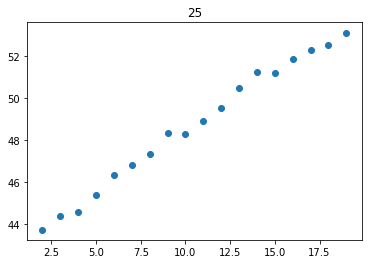

2
43.0511828469


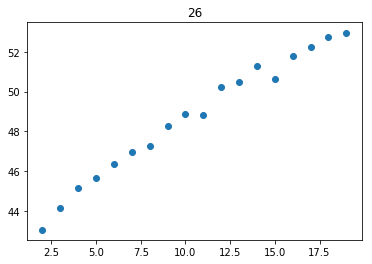

2
43.3403247706


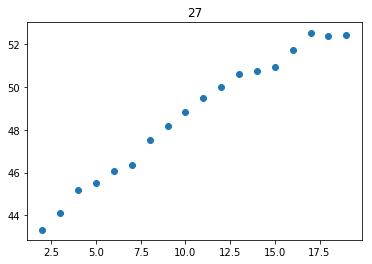

2
43.6299755394


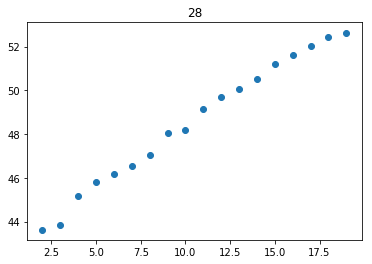

2
44.0648322588


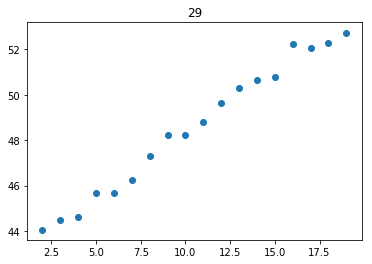

2
43.7555303841


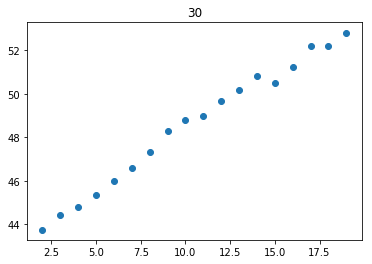

2
43.5702125402


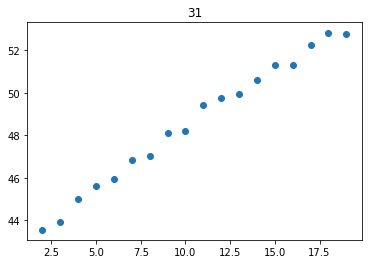

2
43.6831515832


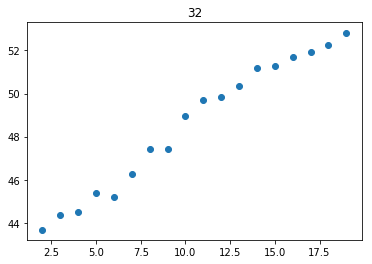

2
43.209292743


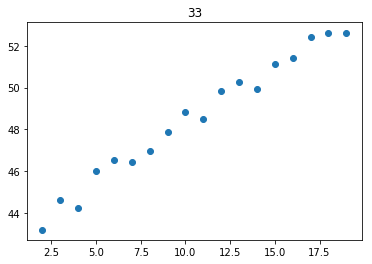

2
43.1701467343


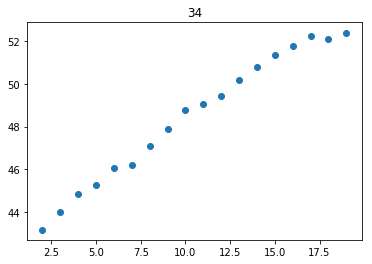

2
42.9440588204


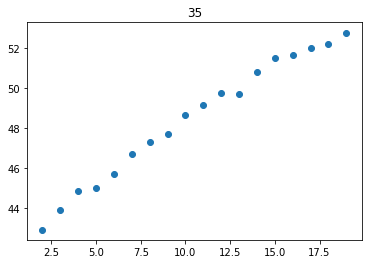

2
43.5525944681


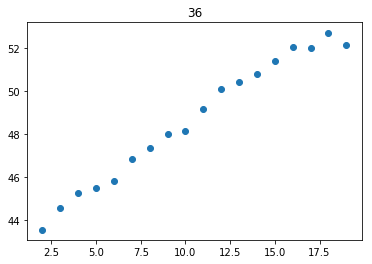

2
43.66327858


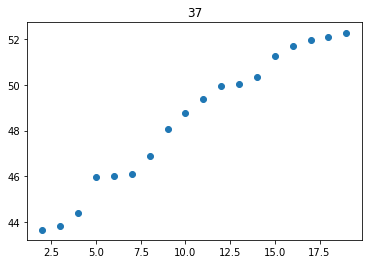

2
43.6816839361


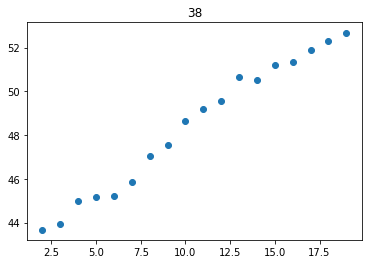

2
43.0300756276


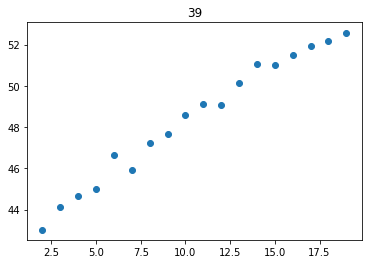

2
43.3535169044


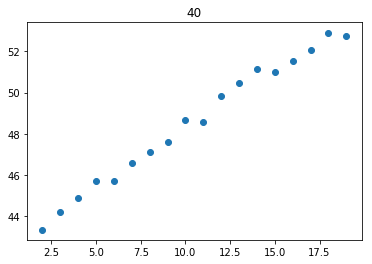

2
43.3925748267


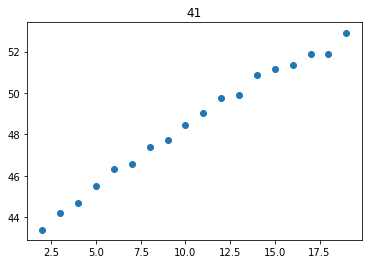

2
43.3546340197


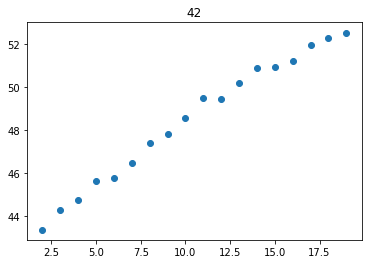

2
43.1018874251


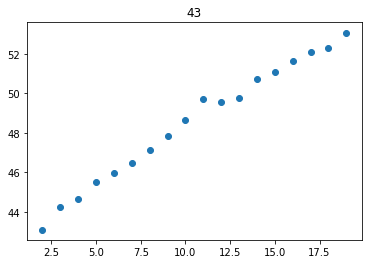

2
43.3593331074


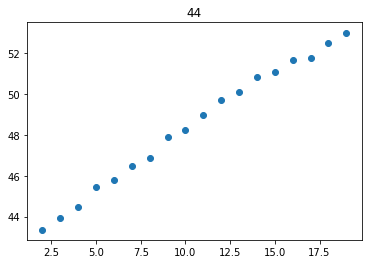

2
43.4126913294


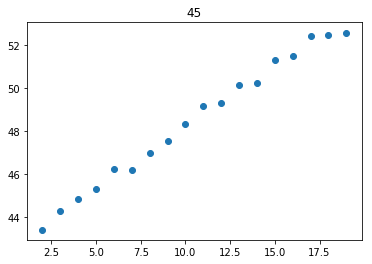

2
43.9632902843


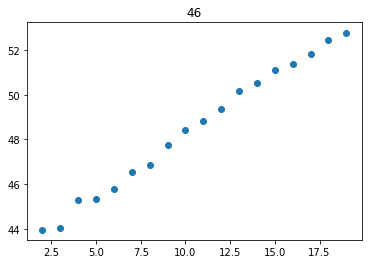

2
43.2563754033


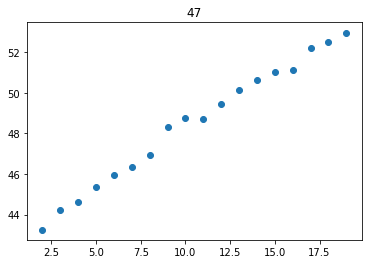

2
43.224138842


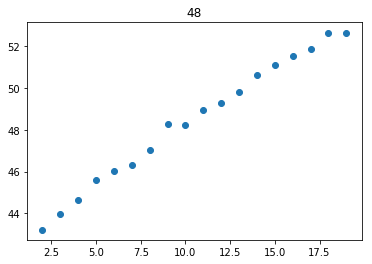

2
42.762636113


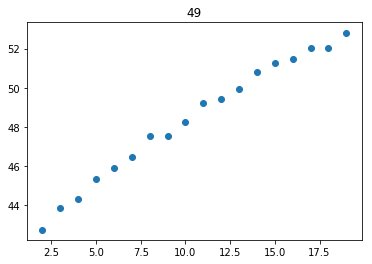

In [27]:
estimators = range(25, 50)
for estimator in estimators:
    rmses_estimator_leaf = []
    for min_leaf in range(2, 20):
        rf = RandomForestRegressor(n_estimators=estimator, min_samples_leaf=min_leaf)
        rf.fit(train[cols], train['cnt'])
        pr = rf.predict(test[cols])
        rmse = mean_squared_error(test['cnt'], pr) ** (1/2)
        rmses_estimator_leaf.append(rmse)
    print(np.argmin(rmses_estimator_leaf)+2)
    print(np.amin(rmses_estimator_leaf))
    plt.scatter(range(2, 20), rmses_estimator_leaf)
    plt.title(estimator)
    plt.show()
